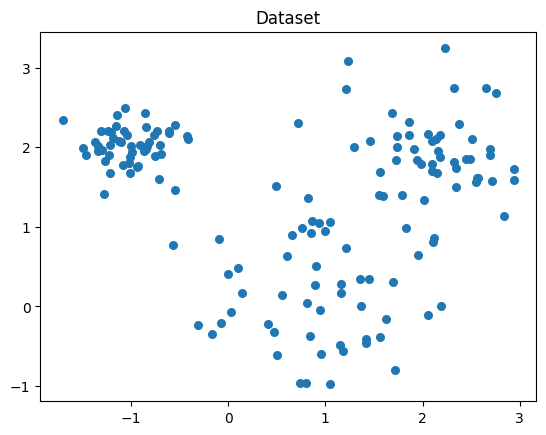

Converged after 6 iterations
K-Means Distance: 68.33954101133924


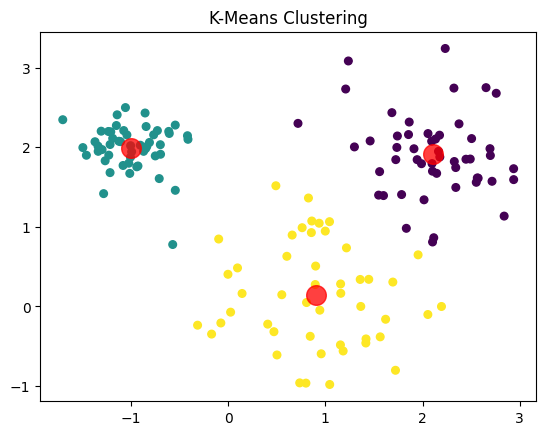

Converged after 7 iterations
K-Medoids Distance: 69.411093778812


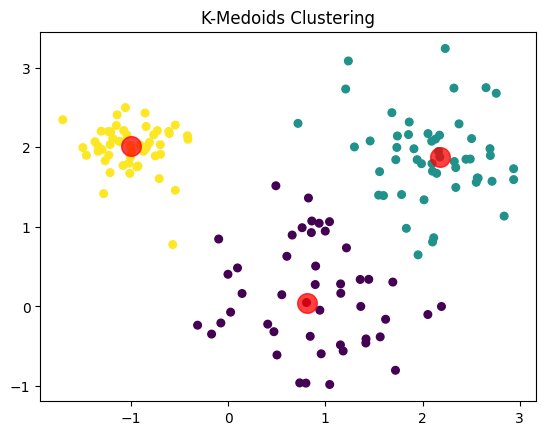

Distance Comparison: K-Means: 68.33954101133924, K-Medoids: 69.411093778812


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def initialize_centroids(X, k):
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def update_medoids(X, clusters, k):
    new_medoids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        medoid = min(cluster_points, key=lambda point: np.sum([euclidean_distance(point, other) for other in cluster_points]))
        new_medoids.append(medoid)
    return np.array(new_medoids)

def compute_inertia(X, centroids, clusters):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[clusters == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

def clustering(X, k, max_iters=100, method='kmeans'):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        if method == 'kmeans':
            new_centroids = update_centroids(X, clusters, k)
        elif method == 'kmedoids':
            new_centroids = update_medoids(X, clusters, k)
        else:
            raise ValueError("Method must be either 'kmeans' or 'kmedoids'")

        if np.all(centroids == new_centroids):
            print(f"Converged after {i+1} iterations")
            break
        
        centroids = new_centroids
    
    inertia = compute_inertia(X, centroids, clusters)
    return centroids, clusters, inertia

np.random.seed(34)
X = np.vstack([
    np.random.randn(50, 2) * 0.75 + np.array([1, 0]),
    np.random.randn(50, 2) * 0.25 + np.array([-1, 2]),
    np.random.randn(50, 2) * 0.5 + np.array([2, 2])
])

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Dataset")
plt.show()

k = 3

centroids_kmeans, clusters_kmeans, inertia_kmeans = clustering(X, k, method='kmeans')
print(f"K-Means Distance: {inertia_kmeans}")

plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, s=30, cmap='viridis')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()

centroids_kmedoids, clusters_kmedoids, inertia_kmedoids = clustering(X, k, method='kmedoids')
print(f"K-Medoids Distance: {inertia_kmedoids}")

plt.scatter(X[:, 0], X[:, 1], c=clusters_kmedoids, s=30, cmap='viridis')
plt.scatter(centroids_kmedoids[:, 0], centroids_kmedoids[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Medoids Clustering")
plt.show()

print(f"Distance Comparison: K-Means: {inertia_kmeans}, K-Medoids: {inertia_kmedoids}")